In [108]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import os
import math
%matplotlib inline

In [29]:
with open(r'D:\all_programming\wetting-analysis\DataFiles\2dContourDataGrid0_5.txt', 'r') as file:
    x_vals = {}
    y_vals = {}
    for row in file:

        if row.startswith('Frame: '):
            row = row.strip()
            junk, current_frame = row.split(': ')
            current_frame = int(current_frame) 
            x_vals[current_frame] = []
            y_vals[current_frame] = []

        elif row.startswith('{'):
            row = row.strip()
            row = row.replace(', ', 'ß')
            row = row.replace('} {', 'ß')
            row = row.replace('{', '')
            row = row.replace('}', '')
            broken_row = row.split('ß')

            for i in range(len(broken_row)):
                if i % 2 == 0:
                    x_vals[current_frame].append(broken_row[i])
                elif i % 2 == 1:
                    y_vals[current_frame].append(broken_row[i])

In [33]:
for i in range(len(x_vals.keys())):
    print(f'x{i}: {x_vals[i]}')
    print(f'y{i}: {y_vals[i]}')

x0: ['-0.5', '-1.0', '-1.5', '-10.0', '-10.5', '-11.0', '-11.5', '-12.0', '-12.5', '-13.0', '-13.5', '-14.0', '-14.5', '-15.0', '-15.5', '-16.0', '-16.5', '-17.0', '-17.5', '-18.0', '-18.5', '-19.0', '-19.5', '-2.0', '-2.5', '-20.0', '-20.5', '-21.0', '-21.5', '-22.0', '-22.5', '-23.0', '-23.5', '-24.0', '-24.5', '-25.0', '-25.5', '-26.0', '-26.5', '-27.0', '-27.5', '-28.0', '-28.5', '-29.0', '-29.5', '-3.0', '-3.5', '-30.0', '-30.5', '-31.0', '-31.5', '-32.0', '-32.5', '-33.0', '-33.5', '-34.0', '-34.5', '-35.0', '-35.5', '-36.0', '-36.5', '-37.0', '-37.5', '-38.0', '-38.5', '-39.0', '-39.5', '-4.0', '-4.5', '-40.0', '-40.5', '-41.0', '-41.5', '-42.0', '-42.5', '-43.0', '-43.5', '-44.0', '-44.5', '-45.0', '-45.5', '-46.0', '-46.5', '-47.0', '-47.5', '-48.0', '-48.5', '-49.0', '-49.5', '-5.0', '-5.5', '-50.0', '-50.5', '-51.0', '-51.5', '-52.0', '-52.5', '-53.0', '-53.5', '-54.0', '-54.5', '-55.0', '-55.5', '-56.0', '-56.5', '-57.0', '-57.5', '-58.0', '-58.5', '-59.0', '-59.5', '-6.0',

{0: [[73.5, 73.0, 72.5, 64.0, 63.5, 63.0, 62.5, 62.0, 61.5, 61.0, 60.5, 60.0, 59.5, 59.0, 58.5, 58.0, 57.5, 57.0, 56.5, 56.0, 55.5, 55.0, 54.5, 72.0, 71.5, 54.0, 53.5, 53.0, 52.5, 52.0, 51.5, 51.0, 50.5, 50.0, 49.5, 49.0, 48.5, 48.0, 47.5, 47.0, 46.5, 46.0, 45.5, 45.0, 44.5, 71.0, 70.5, 44.0, 43.5, 43.0, 42.5, 42.0, 41.5, 41.0, 40.5, 40.0, 39.5, 39.0, 38.5, 38.0, 37.5, 37.0, 36.5, 36.0, 35.5, 35.0, 34.5, 70.0, 69.5, 34.0, 33.5, 33.0, 32.5, 32.0, 31.5, 31.0, 30.5, 30.0, 29.5, 29.0, 28.5, 28.0, 27.5, 27.0, 26.5, 26.0, 25.5, 25.0, 24.5, 69.0, 68.5, 24.0, 23.5, 23.0, 22.5, 22.0, 21.5, 21.0, 20.5, 20.0, 19.5, 19.0, 18.5, 18.0, 17.5, 17.0, 16.5, 16.0, 15.5, 15.0, 14.5, 68.0, 67.5, 14.0, 13.5, 13.0, 12.5, 12.0, 11.5, 11.0, 10.5, 10.0, 9.5, 9.0, 8.5, 8.0, 7.5, 7.0, 6.5, 6.0, 5.5, 5.0, 4.5, 67.0, 66.5, 4.0, 3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0, 66.0, 65.5, 65.0, 64.5, 74.0, 74.5, 75.0, 75.5, 84.0, 84.5, 85.0, 85.5, 86.0, 86.5, 87.0, 87.5, 88.0, 88.5, 89.0, 89.5, 90.0, 90.5, 91.0, 91.5, 92.0, 

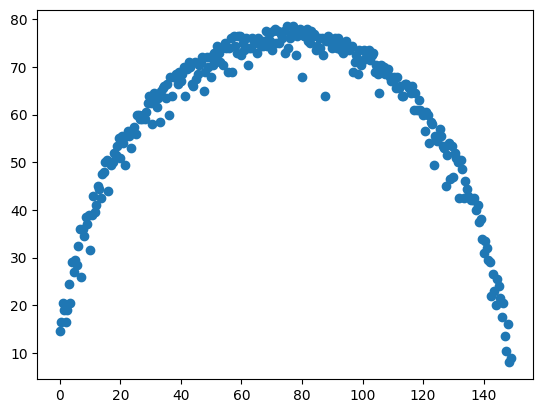

In [132]:
plt.scatter(pure_data[0][0],pure_data

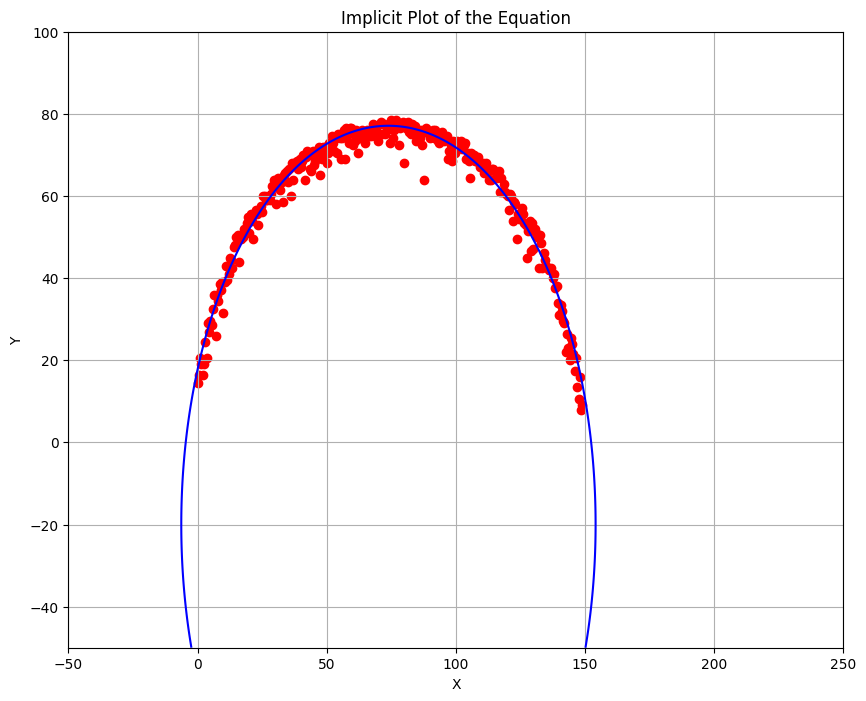

TypeError: object of type 'numpy.float64' has no len()

In [134]:
frame_list = []
angle_list = []
x_0_list = []
ellipse_fit_error = 0

for frame in range(len(density_positions.keys())):
    
    X_data = np.array(x_data[frame])  # X values
    Y_data = np.array(y_data[frame])  # Y values
    
    x_0 = max(X_data) / 2  # Generally true statement 
    x_0_list.append(x_0)
    x_0_pm = 5

    # Initial guess for the parameters [a, b, y_0, C, x_0]
    initial_guess = [0.4, 0.5, -11.1, 10, x_0]

    # Define bounds for the parameters: (a, b, y_0, C, x_0)
    a_B = (0.1, 100)
    b_B = (0.1, 100)
    y_0_B = (-50, -20)
    C_B = (-100, 100)
    x_0_B = (x_0 - x_0_pm, x_0 + x_0_pm)
    
    bounds = [a_B, b_B, y_0_B, C_B, x_0_B] 

    # Perform the optimization
    result = minimize(objective, initial_guess, args=(X_data, Y_data), method='L-BFGS-B', bounds=bounds)

    # Extract the optimal parameters
    a_opt, b_opt, y_0_opt, C_opt, x_0_opt = result.x

    # Create a grid of points
    x = np.linspace(-50, 250, 400)
    y = np.linspace(-50, 100, 400)
    X, Y = np.meshgrid(x, y)
    Z = implicit_eq(X, Y, a_opt, b_opt, y_0_opt, C_opt, x_0_opt)

    # Plot the contour where Z = 0
    plt.figure(figsize=(10, 8))
    contour = plt.contour(X, Y, Z, levels=[0], colors='blue')
    plt.title('Implicit Plot of the Equation')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.scatter(X_data, Y_data, color='red')  # Scatter plot of your data points

    subdirectory = r'C:\Users\jeffs\Downloads\SZvsWorkspaceUpper\SZvsWorkspace\Research\Project2WettingAngle\ProgramOutputs\fitting_methods'
    plot_path = os.path.join(subdirectory, f'best_fit_ellipse{frame}.png')
    #plt.savefig(plot_path)

    plt.show()

    for i in range(len(x_data[frame])):
        ellipse_fit_error += np.abs((1/(a_opt**2))*x_data[frame][i]**2 - (2*x_0_opt/(a_opt**2))*x_data[frame][i] + (1/(b_opt**2))*y_data[frame][i]**2 - (2*y_0_opt)/(b_opt**2)*y_data[frame][i] - C_opt)

    # Angle calculation
    x_a = x_0_opt + math.sqrt(x_0**2 + C_opt * a_opt**2)
    dydx_x_a = b_opt**2*(x_0-x_a)/(a_opt**2*(-y_0_opt))
    theta = abs(math.atan(dydx_x_a)) * 180 / math.pi

    # Creating x & y datas
    frame_list.append(frame)
    angle_list.append(theta)

    print(f"Optimal parameters: a={a_opt}, b={b_opt}, y_0={y_0_opt}, C={C_opt}, x_0={x_0_opt}")
    print(f'Angle: {theta}')